In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('twitter.csv')

In [3]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
df['labels'] = df['class'].map({ 0: 'Hate Speech', 1: 'Offensive', 2: 'No hate or offensive language'})

In [8]:
data = df[['tweet', 'labels']]

In [9]:
df['labels'].value_counts()

labels
Offensive                        19190
No hate or offensive language     4163
Hate Speech                       1430
Name: count, dtype: int64

In [10]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive
24781,youu got wild bitches tellin you lies,Offensive


### Data Visualisation

<Axes: xlabel='labels', ylabel='count'>

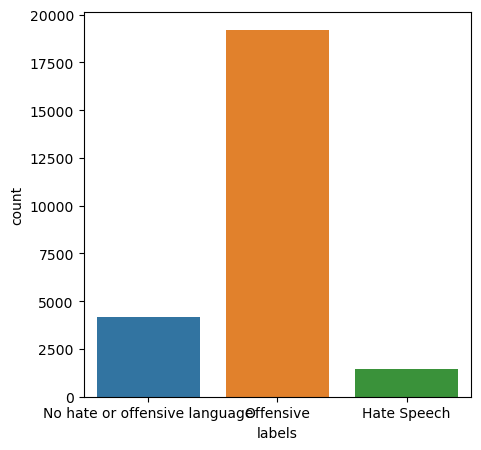

In [11]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='labels', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

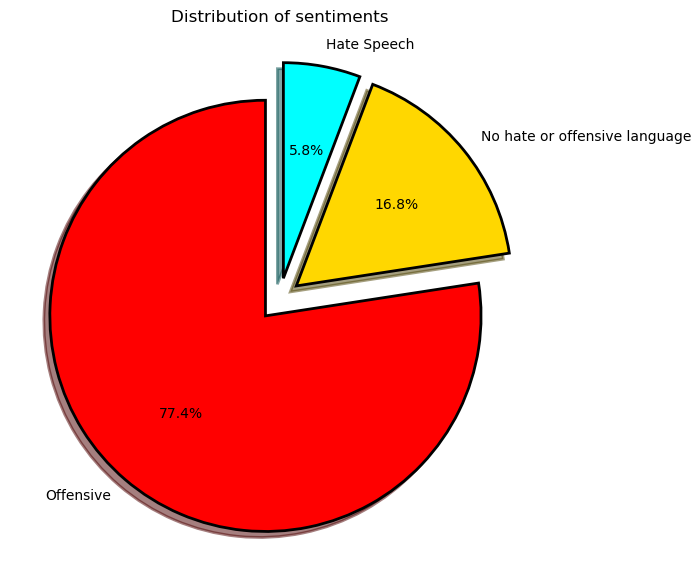

In [12]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold", "cyan")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = data['labels'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')


In [105]:
no_hate_tweets = data[(data.labels == 'No hate or offensive language')] 
no_hate_tweets.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,No hate or offensive language
40,momma said pussi cat insid doghous,No hate or offensive language
63,addicted2guy simplyaddictedtoguy woof woof hot...,No hate or offensive language
66,allaboutmanfeet woof woof hot sole,No hate or offensive language
67,allyhaaaaa lemmi eat oreo amp dish one oreo lol,No hate or offensive language


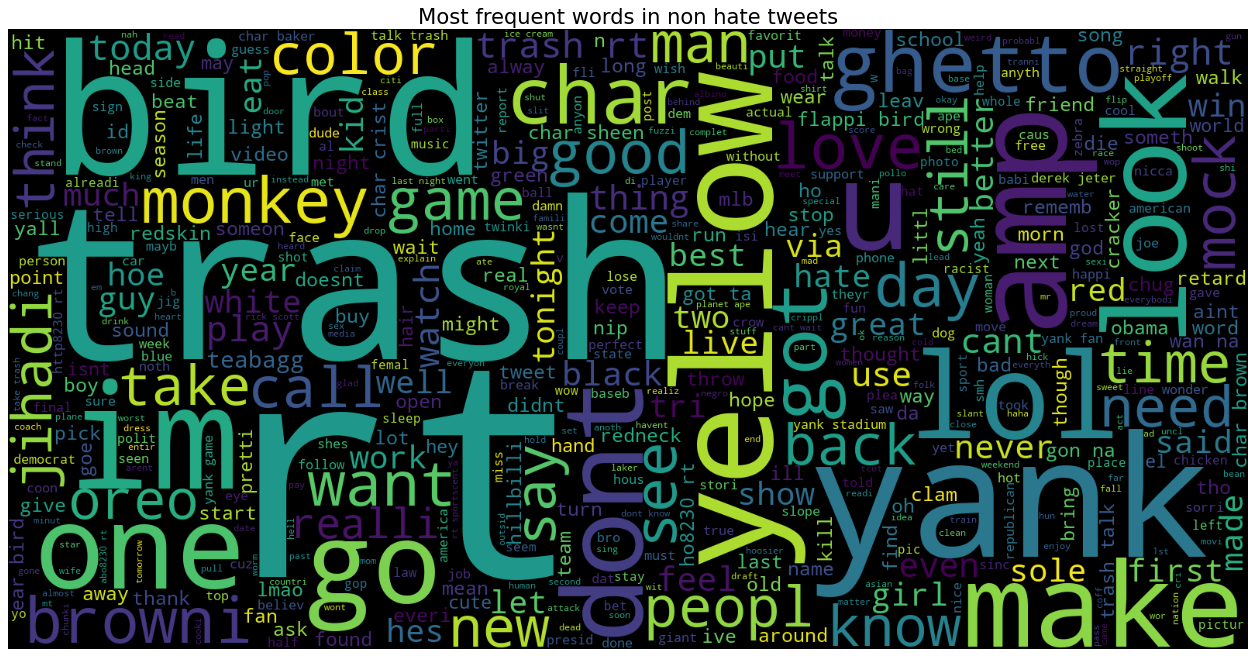

In [106]:
text = ' '.join([word for word in no_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [108]:
offensive_tweets = data[(data.labels == 'Offensive')] 
offensive_tweets.head()

,tweet,labels
1,rt mleew17 boy dat coldtyga dwn bad cuffin dat...,Offensive
2,rt urkindofbrand dawg rt 80sbaby4lif ever fuck...,Offensive
3,rt c g anderson viva base look like tranni,Offensive
4,rt shenikarobert shit hear might true might fa...,Offensive
5,madison x shit blow meclaim faith somebodi sti...,Offensive


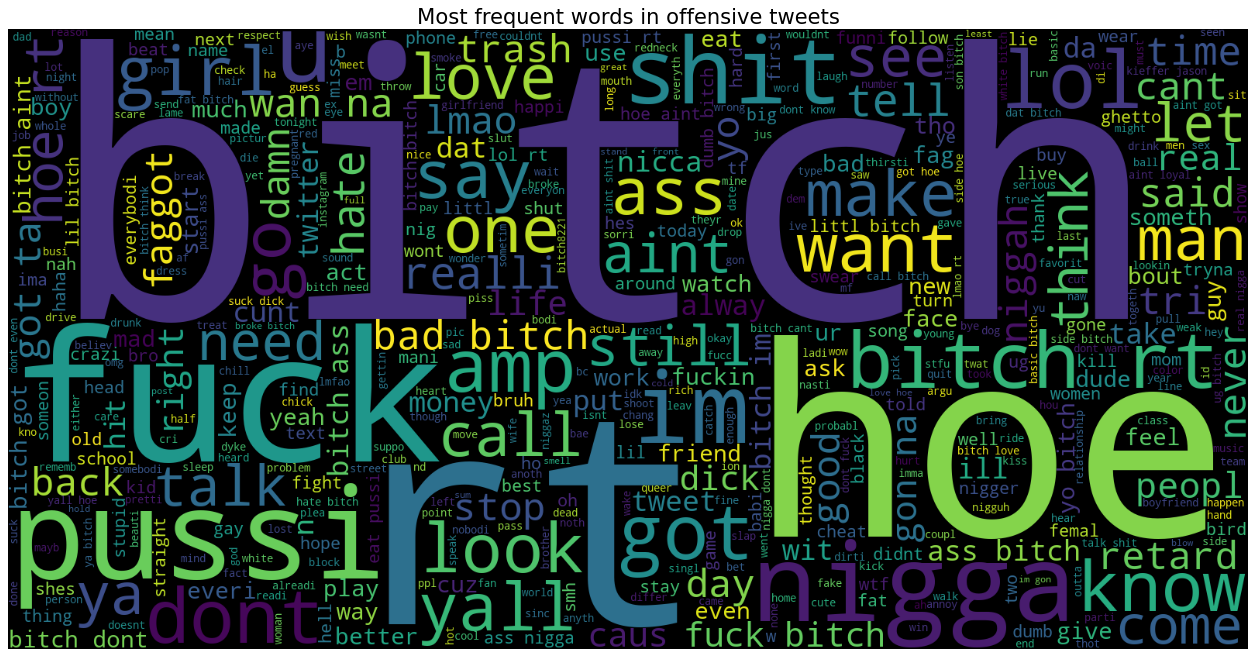

In [110]:
text = ' '.join([word for word in offensive_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in offensive tweets', fontsize = 19)
plt.show()

In [113]:
neg_tweets = data[data.labels == 'Hate Speech']
neg_tweets.head()

,tweet,labels
85,blackman38tid halelookyh howdydowdy11 queer ga...,Hate Speech
89,cb baby24 hite thunduh alsarabsss hes beaner s...,Hate Speech
110,devilgrimz vigxrart fuck gay blacklist hoe hol...,Hate Speech
184,markroundtreejr lmfaoooo hate black peopl blac...,Hate Speech
202,nochillpaz least im nigger lmfao,Hate Speech


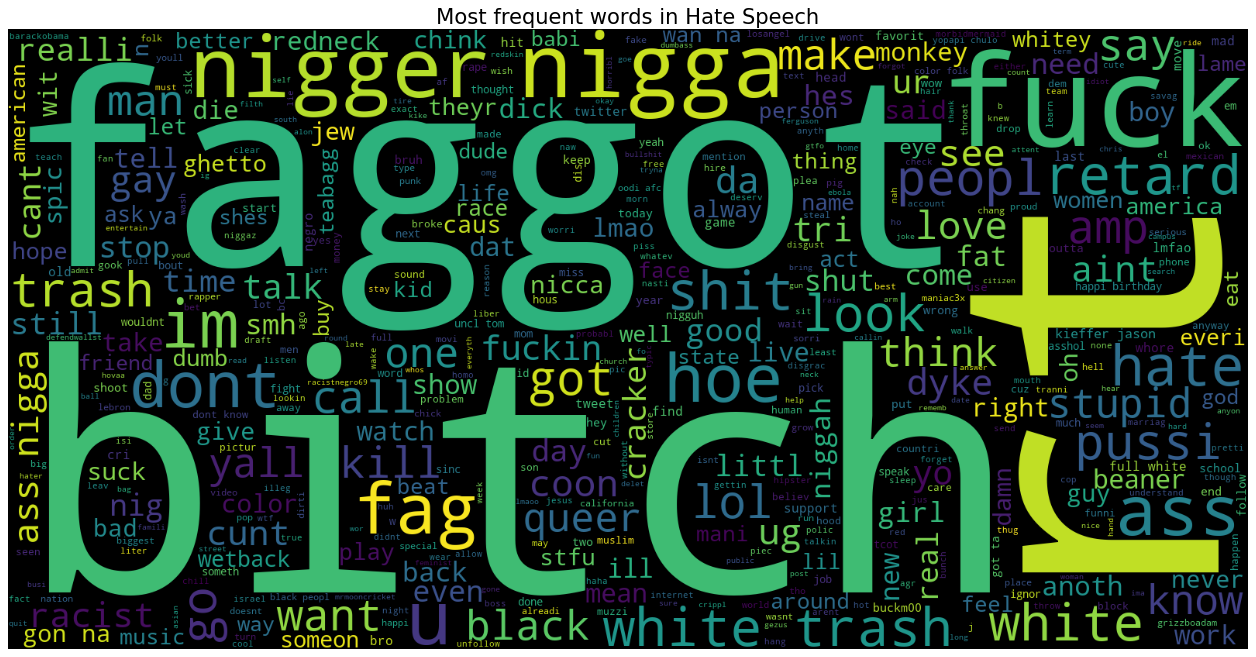

In [114]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Hate Speech', fontsize = 19)
plt.show()

Conclusion : both hate speech and offensive text should be labelled as hate speech since they have almost similar words.

### Data Preprocessing

In [117]:
df['labels'] = df['class'].map({ 0: 'Hate Speech', 1: 'Hate Speech', 2: 'No hate or offensive language'})

In [118]:
data = df[['tweet', 'labels']]

In [120]:
data['labels'].value_counts()

labels
Hate Speech                      20620
No hate or offensive language     4163
Name: count, dtype: int64

In [121]:
#Removal of stopwords and stemming the words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ridyagupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ridyagupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ridyagupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [122]:
stopwords = set(stopwords.words("english"))

In [123]:
#import stemming
stemmer = nltk.SnowballStemmer("english")

In [124]:
#creating a function to process the data
def data_processing(tweet):
    tweet = str(tweet).lower()
    tweet = re.sub(r"https?://\S+|www\.S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub('[%s]'%re.escape(string.punctuation), ' ', tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet = re.sub(r'\n','',tweet)
    tweet_tokens = word_tokenize(tweet)
    #stop word removal
    filtered_tweets = [w for w in tweet_tokens if not w in stopwords]
    filtered_tweets = " ".join(filtered_tweets)
    #stemming the text
    tweet = [stemmer.stem(word) for word in filtered_tweets.split(' ')]
    tweet = " ".join(tweet)
    return tweet

In [125]:
data.tweet = data['tweet'].apply(data_processing)

In [126]:
data = data.drop_duplicates('tweet')

In [127]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [128]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,No hate or offensive language
1,rt mleew17 boy dat coldtyga dwn bad cuffin dat...,Hate Speech
2,rt urkindofbrand dawg rt 80sbaby4lif ever fuck...,Hate Speech
3,rt c g anderson viva base look like tranni,Hate Speech
4,rt shenikarobert shit hear might true might fa...,Hate Speech
...,...,...
24778,yous muthafin lie 8220lifeask 20 pearl corey e...,Hate Speech
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wan na eat dat nigguh like aint fuc...,Hate Speech
24781,youu got wild bitch tellin lie,Hate Speech


In [129]:
data['tweet'] = data['tweet'].apply(lambda x: lemmatizing(x))

In [130]:
x = np.array(data['tweet'])
y = np.array(data['labels'])

In [131]:
x

array(['rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'rt mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place',
       'rt urkindofbrand dawg rt 80sbaby4lif ever fuck bitch start cri confus shit',
       ..., 'young buck wan na eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      dtype=object)

In [132]:
data['labels'].value_counts()

labels
Hate Speech                      20502
No hate or offensive language     4122
Name: count, dtype: int64

In [133]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [134]:
x

<24624x33689 sparse matrix of type '<class 'numpy.int64'>'
	with 215429 stored elements in Compressed Sparse Row format>

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [136]:
x_train, y_train

(<19699x33689 sparse matrix of type '<class 'numpy.int64'>'
 	with 172079 stored elements in Compressed Sparse Row format>,
 array(['Hate Speech', 'Hate Speech', 'Hate Speech', ...,
        'No hate or offensive language', 'Hate Speech', 'Hate Speech'],
       dtype=object))

### Building the Model

In [137]:
#LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [138]:
acc = accuracy_score(lr_predict, y_test)
print("Test accuarcy: {:.2f}%".format(acc*100))

Test accuarcy: 95.17%


In [139]:
print(confusion_matrix(y_test, lr_predict))
print("\n")
print(classification_report(y_test, lr_predict))

[[3997  128]
 [ 110  690]]


                               precision    recall  f1-score   support

                  Hate Speech       0.97      0.97      0.97      4125
No hate or offensive language       0.84      0.86      0.85       800

                     accuracy                           0.95      4925
                    macro avg       0.91      0.92      0.91      4925
                 weighted avg       0.95      0.95      0.95      4925



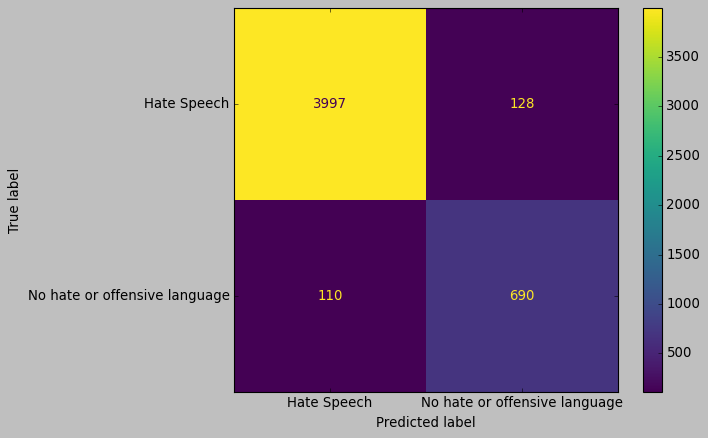

In [140]:
style.use('classic')
cm = confusion_matrix(y_test, lr_predict, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

In [141]:
#GridSearchCV

In [142]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [143]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.95
Best parameters:  {'C': 1.0, 'solver': 'liblinear'}


In [144]:
y_pred = grid.predict(x_test)

In [145]:
acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(acc*100))

Test accuracy: 95.17%


In [146]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[3997  128]
 [ 110  690]]


                               precision    recall  f1-score   support

                  Hate Speech       0.97      0.97      0.97      4125
No hate or offensive language       0.84      0.86      0.85       800

                     accuracy                           0.95      4925
                    macro avg       0.91      0.92      0.91      4925
                 weighted avg       0.95      0.95      0.95      4925



In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [148]:
x_train, y_train

(<19699x33689 sparse matrix of type '<class 'numpy.int64'>'
 	with 172370 stored elements in Compressed Sparse Row format>,
 array(['Hate Speech', 'Hate Speech', 'Hate Speech', ..., 'Hate Speech',
        'Hate Speech', 'Hate Speech'], dtype=object))

In [149]:
#Decision Tree

In [150]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [151]:
y_pred = dt.predict(x_test)

In [152]:
acc = accuracy_score(y_test, y_pred)
print("Test accuarcy: {:.2f}%".format(acc*100))

Test accuarcy: 93.60%


In [153]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[3922  165]
 [ 150  688]]


                               precision    recall  f1-score   support

                  Hate Speech       0.96      0.96      0.96      4087
No hate or offensive language       0.81      0.82      0.81       838

                     accuracy                           0.94      4925
                    macro avg       0.88      0.89      0.89      4925
                 weighted avg       0.94      0.94      0.94      4925



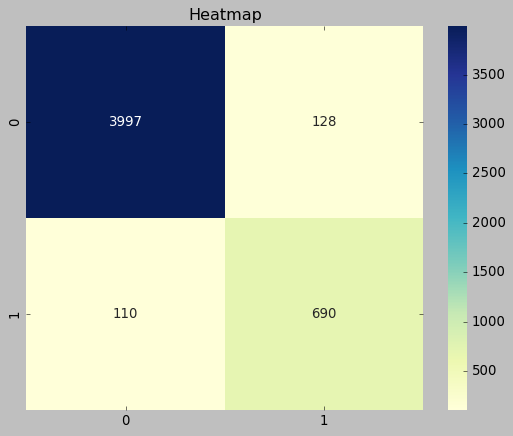

In [154]:
sns.heatmap(cm, annot=True, fmt='', cmap='YlGnBu')
plt.title('Heatmap')
plt.show()

In [155]:
sample = "Let's unite and kill all the people who are protesting against the goverment!"
sample = data_processing(sample)

In [156]:
sample

'let unit kill peopl protest gover'

In [157]:
data1 = cv.transform([sample]).toarray()

In [158]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)

In [159]:
lr.predict(data1)

array(['Hate Speech'], dtype=object)

In [160]:
grid.predict(data1)

array(['Hate Speech'], dtype=object)

We can see that all models are giving almost similar accuracy so we choose Logistic Regression as the final model.